In [2]:
#데이터 핸들링 라이브러리
import pandas as pd
import numpy as np
#데이터 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.family':'AppleGothic'})
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

## 기후별 교통사고 현황
- 일단 월별로 나누지 않고 최근 5년 데이터로 사고건수, 사망자 합해서 비율 따져볼 예정
- 사망률 = 사망자/사고건수 또는 사망률 = 사망자/전체인구
 - 사망률 = 사망자/전체인구로 하면 당연히 맑은 날이 높게 나오기 때문에 전자로 선택
- 아니다 싶으면 월별로 나눠서 최근 2년 데이터로 진행
<br>
<br>

#### 데이터 사용 장단점
1. 최근 5년 전체 데이터 사용
- 장점 : 최근 5년간의 비율을 한눈에 볼 수 있어서 비교하기 좋음
- 단점 : 월별로 구분하기엔 데이터가 너무 많아 그래프 나타내기엔 무리

2. 최근 2년 월별 데이터 사용
- 장점 : 전체보다 좀 더 세세하게 볼 수 있어서 월별로 비교하기엔 좋음
- 단점 : 연도별로 비교할 수가 없고 눈이나 안개 같은 경우엔 값이 없는 경우도 있음,여름이나 겨울 같은 경우 비나 눈이 너무 몰려있는 느낌

=> 둘다 해서 보여주는 것도 좋을 것 같음

- 데이터 시각화
1. 날씨별 사건당 사망률 꺾은선 그래프(완료)
2. 날씨별 교통사고 발생률 막대그래프(완료)
3. 날씨 일수별 사고건수 비율 그래프
4. 다른 나라의 그래프

In [3]:
#필요한 라이브러리
import pandas as pd
import population as pop

In [4]:
#데이터 불러오기(월별로 말고 일단 전체로 취합)
W_R_TA = pd.read_csv('./도로종류별_기상상태별_교통사고_최근5년.csv', encoding='cp949', header=1)
W_R_TA

,도로종류별(1),기상상태별(1),월별(1),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건).1,사망자수 (명).1,부상자수 (명).1,사고건수 (건).2,사망자수 (명).2,부상자수 (명).2,사고건수 (건).3,사망자수 (명).3,부상자수 (명).3,사고건수 (건).4,사망자수 (명).4,부상자수 (명).4
0,일반국도,맑음,전체,15492,597,26115,15872,512,26268,17908,471,29873,16454,452,26371,16479,427,25848
1,일반국도,맑음,1월,1129,47,2005,1157,37,1956,1266,36,2069,1222,42,1983,1047,29,1640
2,일반국도,맑음,2월,1081,47,1744,1281,41,2119,1141,33,2019,1219,35,1914,1229,38,1998
3,일반국도,맑음,3월,1297,47,2160,1201,51,1965,1456,34,2390,1315,34,2042,1319,32,2004
4,일반국도,맑음,4월,1235,52,2021,1230,40,2009,1456,47,2388,1347,39,2163,1470,36,2322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,기타/불명,기타/불명,8월,16,0,21,17,0,23,19,0,22,19,0,37,45,0,72
496,기타/불명,기타/불명,9월,13,0,20,12,0,14,28,0,34,27,0,31,29,0,39
497,기타/불명,기타/불명,10월,10,1,10,12,1,11,31,0,51,21,0,25,36,0,52
498,기타/불명,기타/불명,11월,5,0,6,23,1,31,28,0,35,38,0,45,43,0,48


In [5]:
df = pd.DataFrame(W_R_TA)
df

,도로종류별(1),기상상태별(1),월별(1),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건).1,사망자수 (명).1,부상자수 (명).1,사고건수 (건).2,사망자수 (명).2,부상자수 (명).2,사고건수 (건).3,사망자수 (명).3,부상자수 (명).3,사고건수 (건).4,사망자수 (명).4,부상자수 (명).4
0,일반국도,맑음,전체,15492,597,26115,15872,512,26268,17908,471,29873,16454,452,26371,16479,427,25848
1,일반국도,맑음,1월,1129,47,2005,1157,37,1956,1266,36,2069,1222,42,1983,1047,29,1640
2,일반국도,맑음,2월,1081,47,1744,1281,41,2119,1141,33,2019,1219,35,1914,1229,38,1998
3,일반국도,맑음,3월,1297,47,2160,1201,51,1965,1456,34,2390,1315,34,2042,1319,32,2004
4,일반국도,맑음,4월,1235,52,2021,1230,40,2009,1456,47,2388,1347,39,2163,1470,36,2322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,기타/불명,기타/불명,8월,16,0,21,17,0,23,19,0,22,19,0,37,45,0,72
496,기타/불명,기타/불명,9월,13,0,20,12,0,14,28,0,34,27,0,31,29,0,39
497,기타/불명,기타/불명,10월,10,1,10,12,1,11,31,0,51,21,0,25,36,0,52
498,기타/불명,기타/불명,11월,5,0,6,23,1,31,28,0,35,38,0,45,43,0,48


In [6]:
#사고건수와 사망자수만 추출
accident = df[['도로종류별(1)', '기상상태별(1)','월별(1)', '사고건수 (건)','사망자수 (명)', '사고건수 (건).1', '사망자수 (명).1',
               '사고건수 (건).2', '사망자수 (명).2', '사고건수 (건).3', '사망자수 (명).3', '사고건수 (건).4', '사망자수 (명).4']]
accident

,도로종류별(1),기상상태별(1),월별(1),사고건수 (건),사망자수 (명),사고건수 (건).1,사망자수 (명).1,사고건수 (건).2,사망자수 (명).2,사고건수 (건).3,사망자수 (명).3,사고건수 (건).4,사망자수 (명).4
0,일반국도,맑음,전체,15492,597,15872,512,17908,471,16454,452,16479,427
1,일반국도,맑음,1월,1129,47,1157,37,1266,36,1222,42,1047,29
2,일반국도,맑음,2월,1081,47,1281,41,1141,33,1219,35,1229,38
3,일반국도,맑음,3월,1297,47,1201,51,1456,34,1315,34,1319,32
4,일반국도,맑음,4월,1235,52,1230,40,1456,47,1347,39,1470,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,기타/불명,기타/불명,8월,16,0,17,0,19,0,19,0,45,0
496,기타/불명,기타/불명,9월,13,0,12,0,28,0,27,0,29,0
497,기타/불명,기타/불명,10월,10,1,12,1,31,0,21,0,36,0
498,기타/불명,기타/불명,11월,5,0,23,1,28,0,38,0,43,0


In [7]:
#column 이름 변경
accident.columns = ['도로','기상','월','사고_2017', '사망_2017', '사고_2018', '사망_2018', '사고_2019', 
                    '사망_2019', '사고_2020', '사망_2020','사고_2021', '사망_2021']

accident.head()

#컬럼명 리스트 뽑아두기
col_lst=list(accident.columns)
col_lst= col_lst[3:]

In [8]:
#결측치 원소 제거하기
accident[col_lst]=accident[accident[col_lst] !='-'][col_lst]
accident.dropna(inplace=True)
accident

#데이터를 정수형으로 전환하기
accident[col_lst]= accident[col_lst].astype(int)
accident

/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/414160346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident[col_lst]=accident[accident[col_lst] !='-'][col_lst]
/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/414160346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident.dropna(inplace=True)
/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/414160346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,도로,기상,월,사고_2017,사망_2017,사고_2018,사망_2018,사고_2019,사망_2019,사고_2020,사망_2020,사고_2021,사망_2021
0,일반국도,맑음,전체,15492,597,15872,512,17908,471,16454,452,16479,427
1,일반국도,맑음,1월,1129,47,1157,37,1266,36,1222,42,1047,29
2,일반국도,맑음,2월,1081,47,1281,41,1141,33,1219,35,1229,38
3,일반국도,맑음,3월,1297,47,1201,51,1456,34,1315,34,1319,32
4,일반국도,맑음,4월,1235,52,1230,40,1456,47,1347,39,1470,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,기타/불명,기타/불명,8월,16,0,17,0,19,0,19,0,45,0
496,기타/불명,기타/불명,9월,13,0,12,0,28,0,27,0,29,0
497,기타/불명,기타/불명,10월,10,1,12,1,31,0,21,0,36,0
498,기타/불명,기타/불명,11월,5,0,23,1,28,0,38,0,43,0


### 도로 구분 없이 기상별로 데이터 합치기

In [9]:
accident_group = accident.groupby(['기상']).sum()
accident_group

,사고_2017,사망_2017,사고_2018,사망_2018,사고_2019,사망_2019,사고_2020,사망_2020,사고_2021,사망_2021
기상,,,,,,,,,,
기타/불명,2478,32,2524,34,2641,36,3350,62,4487,66
눈,2552,71,3135,51,788,14,1215,24,2679,46
맑음,390618,7150,384280,6226,412982,5758,368430,5018,357826,4744
비,22035,556,29082,700,28754,488,31464,630,26737,534
안개,299,28,489,50,386,14,272,14,365,41
흐림,14450,524,14494,492,13516,382,14432,408,13964,394


In [10]:
accident_group.sort_values(by='사고_2017', ascending=False, inplace = True)
accident_group

,사고_2017,사망_2017,사고_2018,사망_2018,사고_2019,사망_2019,사고_2020,사망_2020,사고_2021,사망_2021
기상,,,,,,,,,,
맑음,390618,7150,384280,6226,412982,5758,368430,5018,357826,4744
비,22035,556,29082,700,28754,488,31464,630,26737,534
흐림,14450,524,14494,492,13516,382,14432,408,13964,394
눈,2552,71,3135,51,788,14,1215,24,2679,46
기타/불명,2478,32,2524,34,2641,36,3350,62,4487,66
안개,299,28,489,50,386,14,272,14,365,41


In [11]:
accident_group = accident_group[['사고_2017', '사고_2018', '사고_2019', 
                                 '사고_2020', '사고_2021','사망_2017', 
                                '사망_2018', '사망_2019', '사망_2020',
                                '사망_2021']]
accident_group

,사고_2017,사고_2018,사고_2019,사고_2020,사고_2021,사망_2017,사망_2018,사망_2019,사망_2020,사망_2021
기상,,,,,,,,,,
맑음,390618,384280,412982,368430,357826,7150,6226,5758,5018,4744
비,22035,29082,28754,31464,26737,556,700,488,630,534
흐림,14450,14494,13516,14432,13964,524,492,382,408,394
눈,2552,3135,788,1215,2679,71,51,14,24,46
기타/불명,2478,2524,2641,3350,4487,32,34,36,62,66
안개,299,489,386,272,365,28,50,14,14,41


#### 교통사고 날씨비율 데이터

In [12]:
#최근5년치 사고건수의 합
accident_total = pd.DataFrame(accident_group.iloc[:,:5])
accident_copy= accident_total.copy()

In [13]:
#사고건수 비율(100%기준)
accident_total = accident_total.div(accident_total.sum(axis=0), axis=1)*100
accident_total

,사고_2017,사고_2018,사고_2019,사고_2020,사고_2021
기상,,,,,
맑음,90.330503,88.542963,89.961160,87.896594,88.121894
비,5.095599,6.700860,6.263574,7.506388,6.584527
흐림,3.341566,3.339601,2.944233,3.443052,3.438918
눈,0.590151,0.722344,0.171653,0.289863,0.659758
기타/불명,0.573038,0.581561,0.575297,0.799212,1.105015
안개,0.069144,0.112672,0.084084,0.064891,0.089889


In [14]:
#컬럼명 변경
accident_total.columns = ['2017','2018','2019','2020', '2021']
accident_total

,2017,2018,2019,2020,2021
기상,,,,,
맑음,90.330503,88.542963,89.961160,87.896594,88.121894
비,5.095599,6.700860,6.263574,7.506388,6.584527
흐림,3.341566,3.339601,2.944233,3.443052,3.438918
눈,0.590151,0.722344,0.171653,0.289863,0.659758
기타/불명,0.573038,0.581561,0.575297,0.799212,1.105015
안개,0.069144,0.112672,0.084084,0.064891,0.089889


In [15]:
#행열 자리 바꿈
accident_total= accident_total.transpose()
accident_total

기상,맑음,비,흐림,눈,기타/불명,안개
2017,90.330503,5.095599,3.341566,0.590151,0.573038,0.069144
2018,88.542963,6.700860,3.339601,0.722344,0.581561,0.112672
2019,89.961160,6.263574,2.944233,0.171653,0.575297,0.084084
2020,87.896594,7.506388,3.443052,0.289863,0.799212,0.064891
2021,88.121894,6.584527,3.438918,0.659758,1.105015,0.089889


#### 사망률 데이터

In [16]:
death = (accident_group.iloc[:,5:].values / accident_group.iloc[:,:5].values)*100
row = ['맑음', '비', '흐림', '눈', '기타/불명', '안개']

death_rate = pd.DataFrame(death, index=row, columns=['2017','2018','2019','2020', '2021'])
death_rate

,2017,2018,2019,2020,2021
맑음,1.830433,1.620173,1.394250,1.361995,1.325784
비,2.523258,2.406987,1.697155,2.002288,1.997232
흐림,3.626298,3.394508,2.826280,2.827051,2.821541
눈,2.782132,1.626794,1.776650,1.975309,1.717059
기타/불명,1.291364,1.347068,1.363120,1.850746,1.470916
안개,9.364548,10.224949,3.626943,5.147059,11.232877


In [17]:
#행열 자리 바꿈
death_rate = death_rate.transpose()
death_rate

,맑음,비,흐림,눈,기타/불명,안개
2017,1.830433,2.523258,3.626298,2.782132,1.291364,9.364548
2018,1.620173,2.406987,3.394508,1.626794,1.347068,10.224949
2019,1.394250,1.697155,2.826280,1.776650,1.363120,3.626943
2020,1.361995,2.002288,2.827051,1.975309,1.850746,5.147059
2021,1.325784,1.997232,2.821541,1.717059,1.470916,11.232877


### 데이터 시각화

#### 날씨별 교통사고 발생률 그래프

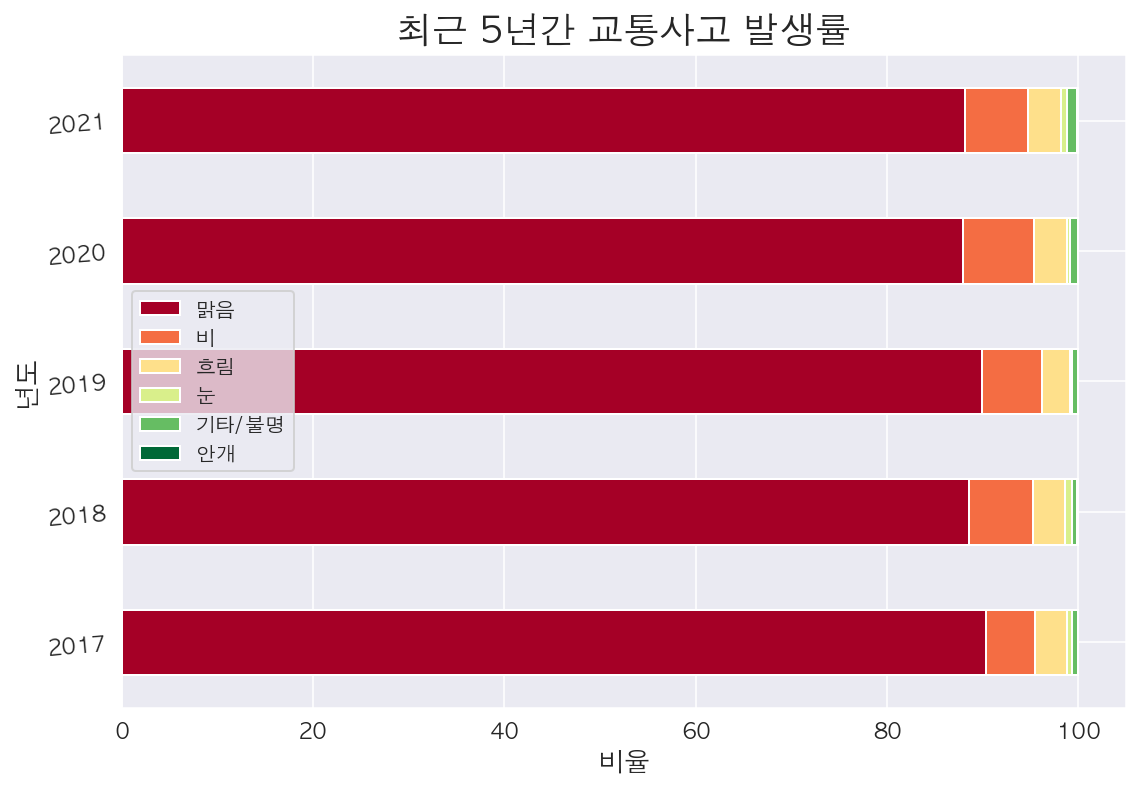

In [18]:
accident_total.plot(kind="barh", stacked=True, figsize = (9,6), colormap='RdYlGn')

#sns.set_style('white')
#sns.despine()
plt.title('최근 5년간 교통사고 발생률', fontsize = 18)
plt.xlabel('비율', fontsize = 13) 
plt.ylabel('년도', fontsize = 13)
plt.xticks(fontsize = 11) 
plt.yticks(fontsize = 11, rotation = 5)
plt.legend( fontsize=10,loc='best')

#비율 숫자표시 해야될 것 같음

plt.show()


## 각 연도별 기상 관측일
- 한 해에 일어난, 특정 기후(맑음 or 비) 상태에서 일어난 사건수 / 한해의 특정 기후가 관측된 일을 계산한다
- 그로써 하루에 특정 기후에서 발생하는 사건수를 계산한다

In [19]:
# 연도별 날씨 데이터 가져오기
weather_category= pd.read_csv('./기상청_전처리된데이터.csv')
weather_category
weather_category.rename({'0':'총 관측일'},axis=1,inplace=True)

#2017년도
year_2017= (weather_category[weather_category['년도']==2017].values)[:,2]

#2018년도
year_2018= (weather_category[weather_category['년도']==2018].values)[:,2]

#2019년도
year_2019= (weather_category[weather_category['년도']==2019].values)[:,2]
year_2019=np.array([year_2019[0],year_2019[1]+year_2019[2]])

#2020년도, 맑음,비
year_2020= (weather_category[weather_category['년도']==2020].values)[:,2]
year_2020=np.array([year_2020[0]+year_2020[2],year_2020[1]+year_2020[3]])

# #2021년도, 맑음,비
year_2021= (weather_category[weather_category['년도']==2021].values)[:,2]
year_2021=np.array([year_2021[0]+year_2021[2],year_2021[1]])

In [20]:
weather_category.groupby('년도').value_counts()
accident_weather= accident_copy.iloc[0:2]
accident_copy.loc['맑음/흐림']= accident_copy.loc['맑음']+accident_copy.loc['흐림']
accident_copy.loc['비/눈']= accident_copy.loc['비']+accident_copy.loc['눈']
accident_weather=accident_copy.iloc[-2:]
accident_weather

,사고_2017,사고_2018,사고_2019,사고_2020,사고_2021
기상,,,,,
맑음/흐림,405068,398774,426498,382862,371790
비/눈,24587,32217,29542,32679,29416


In [27]:
year_2020

array([304,  62])

In [22]:
accident_weather['2017_하루당_사건비율']=accident_weather['사고_2017']/year_2017
accident_weather['2018_하루당_사건비율']=accident_weather['사고_2018']/year_2018
accident_weather['2019_하루당_사건비율']=accident_weather['사고_2019']/year_2019
accident_weather['2020_하루당_사건비율']=accident_weather['사고_2020']/year_2020
accident_weather['2021_하루당_사건비율']=accident_weather['사고_2021']/year_2021
accident_weather

/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/1734825989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_weather['2017_하루당_사건비율']=accident_weather['사고_2017']/year_2017
/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/1734825989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_weather['2018_하루당_사건비율']=accident_weather['사고_2018']/year_2018
/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/1734825989.py:3: SettingWithCopyWarning: 
A val

,사고_2017,사고_2018,사고_2019,사고_2020,사고_2021,2017_하루당_사건비율,2018_하루당_사건비율,2019_하루당_사건비율,2020_하루당_사건비율,2021_하루당_사건비율
기상,,,,,,,,,,
맑음/흐림,405068,398774,426498,382862,371790,1177.523256,1113.893855,1218.565714,1259.414474,1143.969231
비/눈,24587,32217,29542,32679,29416,1365.944444,4602.428571,1969.466667,527.080645,735.400000


In [23]:
#기존 열 드랍하기
accident_weather.drop(['사고_2017','사고_2018','사고_2019','사고_2020','사고_2021'],axis=1,inplace=True)
accident_weather.columns=[17,18,19,20,21]
accident_weather=accident_weather.T
accident_weather

/var/folders/m9/0vsmjxhd7q30k5mzw0bk58hh0000gn/T/ipykernel_78076/1454568001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_weather.drop(['사고_2017','사고_2018','사고_2019','사고_2020','사고_2021'],axis=1,inplace=True)


기상,맑음/흐림,비/눈
17,1177.523256,1365.944444
18,1113.893855,4602.428571
19,1218.565714,1969.466667
20,1259.414474,527.080645
21,1143.969231,735.4


<AxesSubplot:>

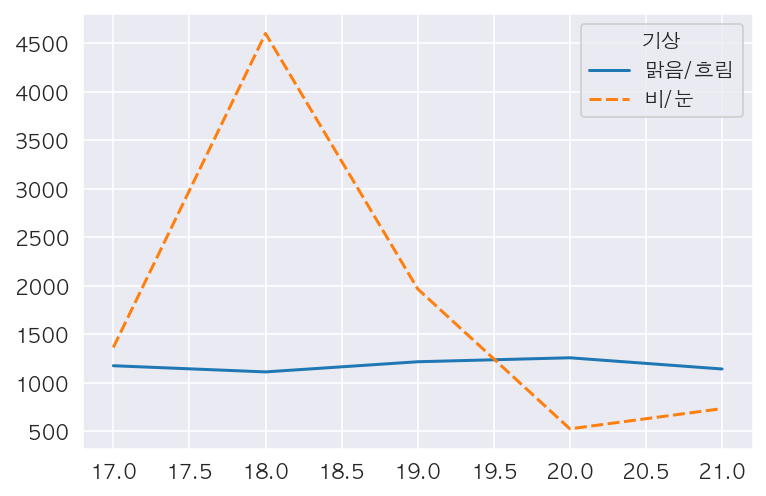

In [24]:
sns.lineplot(data=accident_weather)

## 2018년을 분기로 비/눈에 의한 사고를 대처하는 조치가 취해진 것이 아닐까?
- 2018년도에 비/눈 기후환경에서 1일당 사고량이 약 4600건으로, 맑음/흐림/1100건 대비 지나치게 많이 발생했기 때문에

이런 아이디어로 관련된 연구가 있는지 탐색해보았다
### 관련 레퍼런스(한국 교통연구원)
- 2018년 도로교통사고비용 약 41조 7,601억 원, GDP의 2.2%
- 2018년 1,228,129건의 도로교통사고로 3,657명이 생명을 잃고, 1,935,008명이 다쳤다. 이로 인한 피해를 화폐가치로 환산하면 약 41조7,061억 원이다. 추정된 피해금액은 같은 해
 GDP의 2.2%에 해당한다.
 -  사상자의 물리적 손실비용(생산손실, 의료비, 물적피해 등)은 약 22조 3,134억 원, 정신적 고통비용(PGS: Pain, Grief & Suffering)은 약 19조 3,927억 원으로 추정되었다.

2018년 도로교통사고비용, 2017년 대비 4% 증가
 - 2017년 도로교통 사고비용은 40조 574억 원으로 2018년은 2017년에 비해 도로교통사고비용이 약 4% 증가한 것으로분석됐다.
 - 사고비용이 증가한 이유는 2017년 대비 사망자수가 9.7%, 중상자수가 5.0%로 감소했지만, 경상자수가 10%, 부상신고자수가 6.9% 증가했기 때문이다.

In [25]:
accident_weather

기상,맑음/흐림,비/눈
17,1177.523256,1365.944444
18,1113.893855,4602.428571
19,1218.565714,1969.466667
20,1259.414474,527.080645
21,1143.969231,735.4


- 맑은 날 교통사고가 제일 많이 일어남<br>
=>이유(맑은 날이 많아서?, 사람들이 비나 눈 오는날은 조심해서?)

#### 날씨별 사망률 그래프(교통사고 100건당)

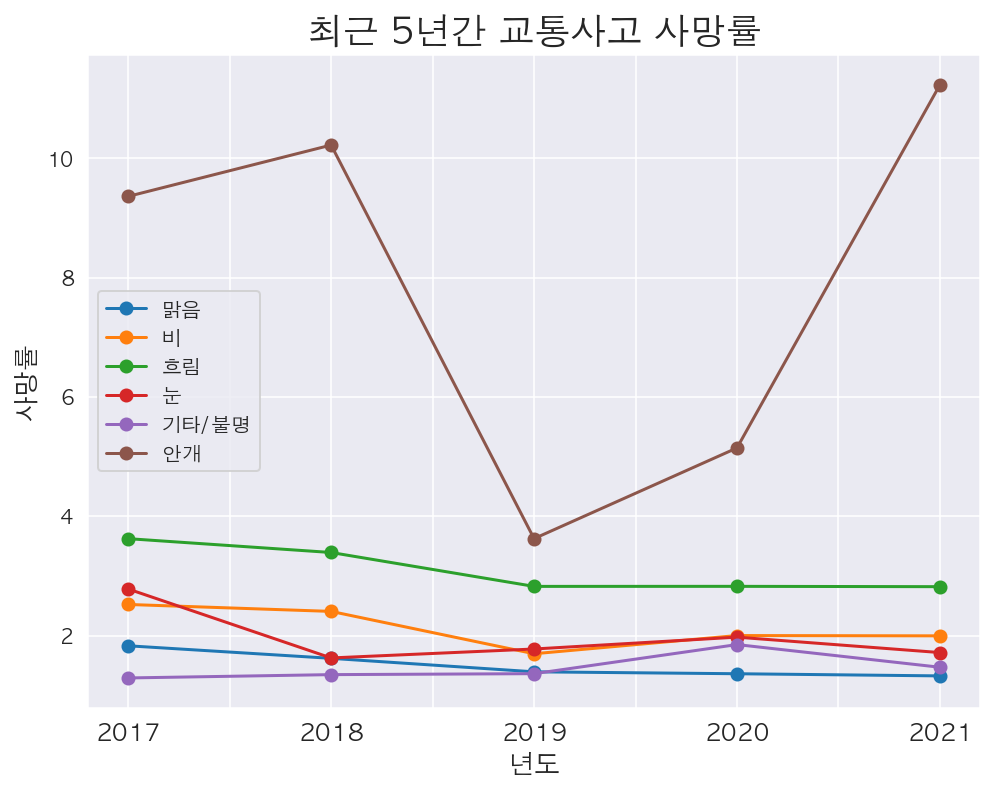

In [26]:
death_rate.plot(marker='o', figsize = (8,6))


plt.title('최근 5년간 교통사고 사망률', fontsize = 18)
plt.xlabel('년도', fontsize=13)    
plt.ylabel('사망률', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.legend( fontsize=10)

plt.show()

- 안개 낀 날에 사건 당 사망률이 왜 높은지<br>
=> 사건 수에 비해 왜 사망자가 높을까?, 2019~2021년 기후 데이터 참고하기